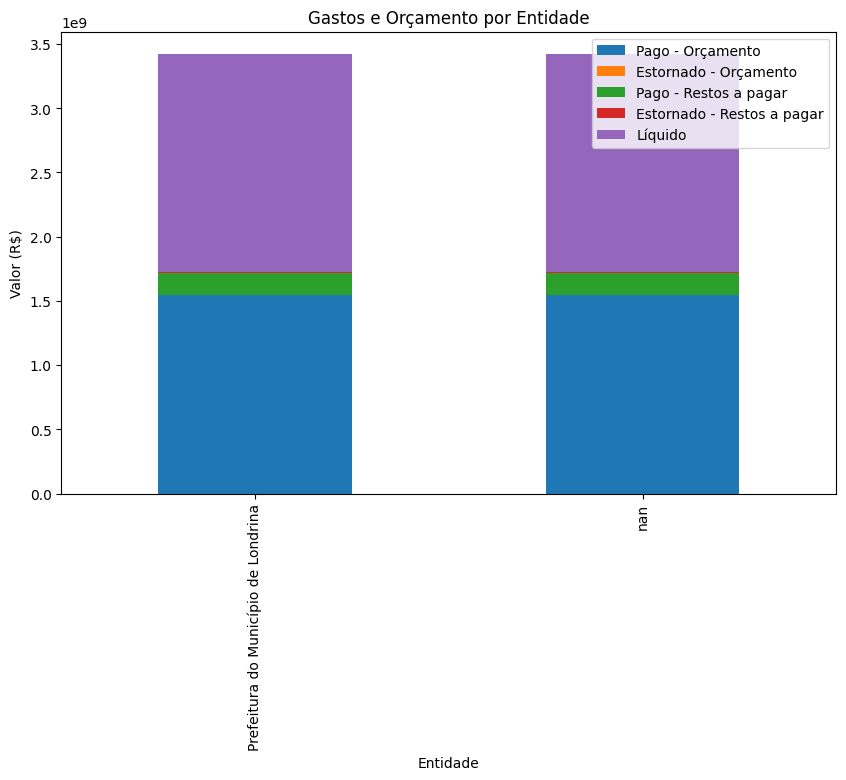

Total Gastos Líquidos: R$3,405,978,945
Total Orçamento: R$3,095,538,403
Total Restos a Pagar: R$349,859,419


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo CSV
orcamento_df = pd.read_csv('DespesaPaga.csv', encoding='latin1', sep=';')

# 1. Conversão de Dados
colunas_monetarias = ['Pago - Orçamento', 'Estornado - Orçamento', 'Pago - Restos a pagar', 'Estornado - Restos a pagar', 'Líquido']

# Remove pontos e substitui vírgulas por ponto, em seguida, converte para float
orcamento_df[colunas_monetarias] = orcamento_df[colunas_monetarias].replace('[^\d\.,]', '', regex=True).apply(lambda x: x.str.replace('.', '').str.replace(',', '.')).astype(float)

# 2. Ajuste para apresentar números no formato desejado
pd.options.display.float_format = '{:,.0f}'.format

# 3. Análise Exploratória
total_gastos = orcamento_df['Líquido'].sum()
total_orcamento = orcamento_df['Pago - Orçamento'].sum() + orcamento_df['Estornado - Orçamento'].sum()
total_restos_a_pagar = orcamento_df['Pago - Restos a pagar'].sum() + orcamento_df['Estornado - Restos a pagar'].sum()

# Visualização Gráfica
orcamento_df.plot(kind='bar', x='Entidade', y=colunas_monetarias, stacked=True, figsize=(10, 6))
plt.title('Gastos e Orçamento por Entidade')
plt.ylabel('Valor (R$)')
plt.show()

# Exibir Totais
print(f'Total Gastos Líquidos: R${total_gastos:,.0f}')
print(f'Total Orçamento: R${total_orcamento:,.0f}')
print(f'Total Restos a Pagar: R${total_restos_a_pagar:,.0f}')
